<a href="https://colab.research.google.com/github/VSCLAByouBot/Identify_elevator_number/blob/main/CNN_toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Mnist Dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
x_train = X_train.reshape(60000, 28, 28, 1)/255
x_test = X_test.reshape(10000, 28, 28, 1)/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [ ]:
acc,val_acc = [],[]
loss_list,val_loss_list = [],[]
lr= 0.001
# Model Structure
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=5, input_shape=(28, 28, 1), activation='sigmoid', padding='VALID'))
model.add(AveragePooling2D(pool_size=2, data_format='channels_last'))
model.add(Conv2D(filters=12, kernel_size=5, input_shape=(12, 12, 1), activation='sigmoid', padding='VALID'))
model.add(AveragePooling2D(pool_size=2, data_format='channels_last'))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))
print(model.summary())

# Train
opt = Adam(learning_rate=lr)
# opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
h1 = model.fit(x_train, y_train, epochs=25, batch_size=64, verbose=1,validation_data=(x_test,y_test))

# Test
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))
acc.append(h1.history['accuracy'])
val_acc.append(h1.history['val_accuracy'])
loss_list.append(h1.history['loss'])
val_loss_list.append(h1.history['val_loss'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 12)          1812      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1930      
Total params: 3,898
Trainable params: 3,898
Non-trainable params: 0
____________________________________________________

Text(0.5, 1.0, 'Model loss')

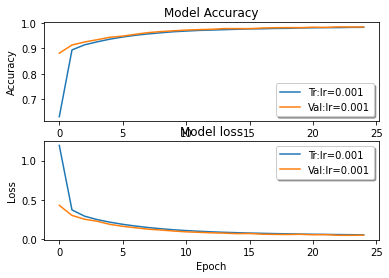

In [ ]:
plt.subplot(211)
plt.plot(acc[0], '-',  label='Tr:lr=0.001')
plt.plot(val_acc[0], '-',  label='Val:lr=0.001')
#plt.plot(acc[1], '-',  label='Tr:lr=0.01')
#plt.plot(val_acc[1], '-',  label='Val:lr=0.01')
plt.legend(loc='lower right', shadow=True) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(212)
plt.plot(loss_list[0], '-',  label='Tr:lr=0.001')
plt.plot(val_loss_list[0], '-',  label='Val:lr=0.001')
#plt.plot(loss_list[1], '-',  label='Tr:lr=0.01')
#plt.plot(val_loss_list[1], '-',  label='Val:lr=0.01')
plt.legend(loc='upper right', shadow=True) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')

In [ ]:
'''
#transfer learning
acc,val_acc = [],[]
loss_list,val_loss_list = [],[]
lr= [0.01,0.001]
for i in range(2):
  model.pop()
  for layer in model.layers:
      layer.trainable = False

  model.add(Dense(30, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.summary()
  # Train
  opt = Adam(learning_rate=lr[i])
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  h2 = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1,validation_data=(x_test,y_test))
  # Test
  loss, accuracy = model.evaluate(x_test, y_test)
  print('Test:')
  print('Loss: %s\nAccuracy: %s' % (loss, accuracy))
  acc.append(h2.history['accuracy'])
  val_acc.append(h2.history['val_accuracy'])
  loss_list.append(h2.history['loss'])
  val_loss_list.append(h2.history['val_loss'])
'''

In [ ]:
'''
plt.subplot(211)
plt.plot(acc[0], '-',  label='Tr:lr=0.01')
plt.plot(val_acc[0], '-',  label='Val:lr=0.01')
plt.plot(acc[1], '-',  label='Tr:lr=0.001')
plt.plot(val_acc[1], '-',  label='Val:lr=0.001')
plt.legend(loc='lower right', shadow=True) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(212)
plt.plot(loss_list[0], '-',  label='Tr:lr=0.01')
plt.plot(val_loss_list[0], '-',  label='Val:lr=0.01')
plt.plot(loss_list[1], '-',  label='Tr:lr=0.001')
plt.plot(val_loss_list[1], '-',  label='Val:lr=0.001')
plt.legend(loc='upper right', shadow=True) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
'''

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving number-9.jpg to number-9.jpg


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('number-5.jpg', cv2.IMREAD_GRAYSCALE)

# detect circles in the image
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1.2, 100, param1=100, param2=30, minRadius=100, maxRadius=400)
print(circles)
# ensure at least some circles were found
if circles is not None:
	x = circles[0, 0, 0]
	y = circles[0, 0, 1]
	r = circles[0, 0, 2]
	print("r", r)
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the pixel and if the pixel is outside the circle, keep it a black pixel
	for i in range(img.shape[0]):
		for j in range(img.shape[1]):
			if ((i-x)**2 + (j-y)**2 >= (r-1)**2):
				img[i,j] = 0
# resize the image size the same as mnist
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
cv2_imshow(img)
image = img.reshape(1, 28, 28, 1)/255
predict = model.predict(image)
print(predict)
print("The number is: ", np.argmax(predict))

(512, 512)
[[[255.00002 256.2     249.64   ]
  [252.6     359.40002 146.2    ]]]
r 249.64


[[6.37274832e-02 1.02478916e-04 2.69952957e-02 2.50257015e-01
  6.98398426e-02 8.13812375e-01 8.49281996e-03 1.27524883e-01
  1.35039240e-01 8.59601021e-01]]
The number is:  9
